In [1]:
%store -r full_dataset

In [6]:
accident_report = full_dataset['tbl_tr_accident_report']['tbl_TR_Accident_report']

In [7]:
accident_report.keys()

Index(['Unit_ID', 'Crime_No', 'Accident_DateTime', 'Fatal_NonFatal',
       'Accident_Classification', 'Severity', 'Collision_Type',
       'Accident_Spot', 'Accident_Location', 'Accident_Zone',
       'NoOfVehicle_Involved', 'Junction_Control', 'Road_Character',
       'Road_Type', 'Road_Classification', 'Road_Width', 'Shoulder_Width',
       'Seperation', 'Surface_Type', 'Surface_Condition', 'Road_Condition',
       'weather', 'Location_Type', 'Main_Cause', 'Hit_Run', 'XY_Map',
       'X_Value', 'AccidentLocation_Map', 'Collision_Diagram', 'Y_Value',
       'Route', 'KM', 'HundredM', 'Node_Map', 'Node1', 'Node2',
       'Accident_City', 'Accident_Road', 'Reporting_Officer', 'LandMark_First',
       'LandMark_Second', 'Distance_LandMark_First',
       'Distance_LandMark_Second', 'Junction_Second_Name',
       'Distance_Second_Road', 'Research_Code', 'Accident_Description',
       'Action_Special_Note', 'UserID', 'Inspection_Officer_Name',
       'Inspection_Officer_Rank', 'Inspection_

In [13]:
accident_report['year'] = accident_report['Actual_DateOf_Occurance'].dt.year
accident_report['month'] = accident_report['Actual_DateOf_Occurance'].dt.month
#accident_report['weekday'] = accident_report['Actual_DateOf_Occurance'].dt.weekday
accident_report['day'] = accident_report['Actual_DateOf_Occurance'].dt.day
accident_report['hour'] = accident_report['Actual_DateOf_Occurance'].dt.hour


In [28]:
accident_report = accident_report[["year", "month", "day", "hour"]]
ymwdh = accident_report[accident_report["year"] > 2014]
ymwdh = ymwdh[ymwdh["year"]<2019]

In [29]:
ymwdh = ymwdh.groupby(["year", "month", "day", "hour"])

In [31]:
#for key, item in ymwdh:
#    print(ymwdh.get_group(key), "\n")

In [39]:
inout_df = ymwdh.size().reset_index(name="count")

In [116]:
y = ymwdh.size().tolist()

In [37]:
#expected_cnt

In [85]:
y = inout_df['count'].tolist()

In [44]:
x = list(zip(
            inout_df["year"].tolist(),
            inout_df["month"].tolist(),
            inout_df["day"].tolist(),
            inout_df["hour"].tolist()    
            ))

In [45]:
total = len(x)

test_size = 500
train = np.array(x)[:-test_size]

[(2015.0, 1.0, 1.0, 0.0), (2015.0, 1.0, 1.0, 1.0)]

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [51]:
from sklearn.neural_network import MLPRegressor

In [52]:
nn = MLPRegressor(
    hidden_layer_sizes=(6,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


In [53]:
n = nn.fit(X_train, y_train)

In [54]:
test_y = nn.predict(X_test)

In [58]:
test_y = [int(round(y)) for y in test_y]

In [188]:
import matplotlib.pyplot as plt

%matplotlib inline  

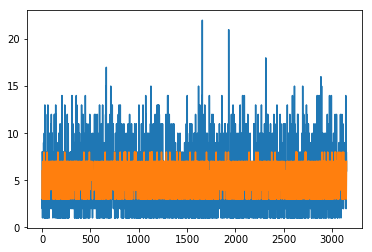

In [61]:
plt.plot(y_test)
plt.plot(test_y)
plt.show()

In [65]:
#!pip install keras

In [66]:
X_train = [list(elem) for elem in X_train]

In [69]:
import numpy as np

In [70]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [75]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(20, activation='relu', input_dim=4))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)


In [76]:
X_test = [list(elem) for elem in X_test]
X_test = np.array(X_test)
y_test = np.array(y_test)

In [77]:
# demonstrate prediction
yhat = model.predict(X_test, verbose=0)
print(yhat)

[[8.176076 ]
 [2.5793889]
 [2.4871037]
 ...
 [7.1011024]
 [8.173947 ]
 [4.2589927]]


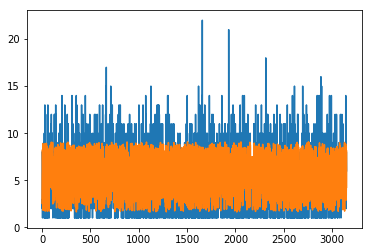

<Figure size 1080x1296 with 0 Axes>

In [84]:
plt.plot(y_test)
plt.plot(yhat)
plt.figure(figsize=(15,18))
plt.show()

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [131]:
from sklearn.preprocessing import MinMaxScaler
y = ymwdh.size().tolist()
y = np.array(y)


In [132]:
y.shape

(31518,)

In [133]:
y = np.expand_dims(y, axis=1)

In [175]:
dataset = y[:500]

In [176]:
y.shape

(31518, 1)

In [177]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [178]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

335 165


In [179]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [180]:
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [181]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [182]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [183]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0462
Epoch 2/100
 - 1s - loss: 0.0317
Epoch 3/100
 - 1s - loss: 0.0295
Epoch 4/100
 - 1s - loss: 0.0289
Epoch 5/100
 - 1s - loss: 0.0284
Epoch 6/100
 - 1s - loss: 0.0284
Epoch 7/100
 - 1s - loss: 0.0283
Epoch 8/100
 - 1s - loss: 0.0281
Epoch 9/100
 - 1s - loss: 0.0279
Epoch 10/100
 - 1s - loss: 0.0282
Epoch 11/100
 - 1s - loss: 0.0278
Epoch 12/100
 - 1s - loss: 0.0280
Epoch 13/100
 - 1s - loss: 0.0275
Epoch 14/100
 - 1s - loss: 0.0278
Epoch 15/100
 - 1s - loss: 0.0276
Epoch 16/100
 - 1s - loss: 0.0279
Epoch 17/100
 - 1s - loss: 0.0274
Epoch 18/100
 - 1s - loss: 0.0273
Epoch 19/100
 - 1s - loss: 0.0274
Epoch 20/100
 - 1s - loss: 0.0271
Epoch 21/100
 - 1s - loss: 0.0275
Epoch 22/100
 - 1s - loss: 0.0271
Epoch 23/100
 - 1s - loss: 0.0273
Epoch 24/100
 - 1s - loss: 0.0272
Epoch 25/100
 - 1s - loss: 0.0271
Epoch 26/100
 - 1s - loss: 0.0268
Epoch 27/100
 - 1s - loss: 0.0272
Epoch 28/100
 - 1s - loss: 0.0272
Epoch 29/100
 - 1s - loss: 0.0271
Epoch 30/100
 - 1s - lo

In [184]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [185]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.53 RMSE
Test Score: 2.72 RMSE


In [186]:
import numpy

In [202]:
plt.rcParams['figure.figsize'] = [15, 10]

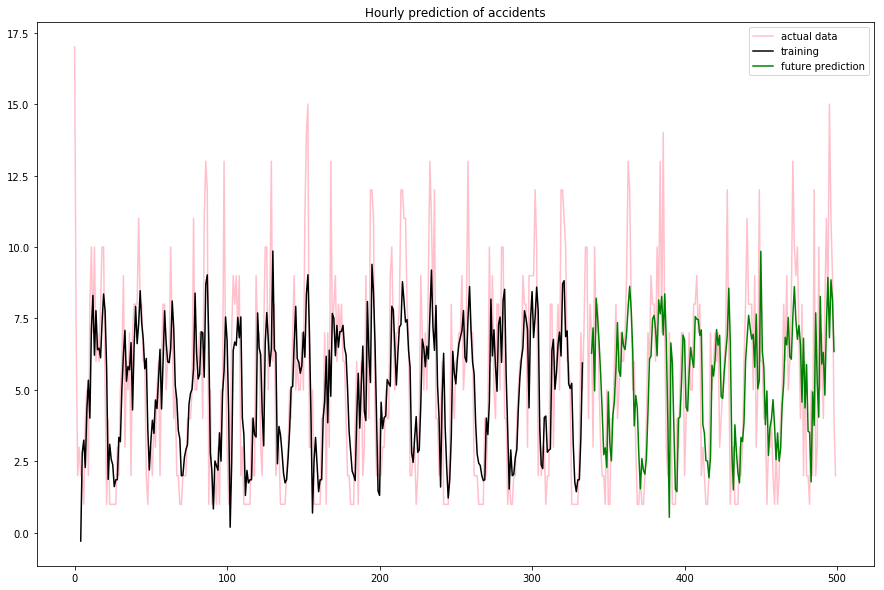

<Figure size 3600x3600 with 0 Axes>

In [214]:
# shift train predictions for plotting
plt.title("Hourly prediction of accidents")
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label="actual data", color="pink")
plt.plot(trainPredictPlot, label='training', color="black")
plt.plot(testPredictPlot, label='future prediction', color="green")
plt.legend()
plt.figure(figsize=(50,50))


#from matplotlib.pyplot import figure
#figure(num=None, figsize=(18, 14), dpi=80, facecolor='w', edgecolor='k')
#figure(figsize=(1,1))
# fig=plt.figure(figsize=(24, 18), dpi= 80, facecolor='w', edgecolor='k')

plt.show()

In [233]:
#accident_report_new = full_dataset['tbl_tr_accident_report']['tbl_TR_Accident_report']
accident_report_new = pd.read_csv('accidents_report.csv')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [234]:
accident_report_new.keys()

Index(['Unnamed: 0', 'Unit_ID', 'Crime_No', 'Accident_DateTime',
       'Fatal_NonFatal', 'Accident_Classification', 'Severity',
       'Collision_Type', 'Accident_Spot', 'Accident_Location',
       ...
       'Hit_Run_val', 'Accident_City_val', 'Accident_Road_val',
       'Lane_Type_val', 'Road_Markings_val', 'Spot_Conditions_val',
       'Side_Walk_val', 'Accident_Location_id_val', 'RoadJunction_val',
       'Accident_spotb_val'],
      dtype='object', length=117)

In [240]:
acc_grpd = accident_report_new.groupby(["Lane_Type_val", "Severity_val"]).size().unstack('Severity_val')

In [241]:
acc_grpd

Severity_val,MINER,Damage Only,Fatal,Grievous Injury,Not Applicable,Simple Injury
Lane_Type_val,,,,,,
DualLane,1.0,1381.0,2334.0,4838.0,259.0,3439.0
FourLane,NaN,373.0,493.0,685.0,53.0,688.0
Intermediate,NaN,12.0,22.0,44.0,7.0,71.0
Others,NaN,539.0,1397.0,3073.0,332.0,2229.0
SingleLane,NaN,593.0,1272.0,3249.0,135.0,2105.0
SixLane,NaN,68.0,79.0,93.0,6.0,134.0


In [245]:
accident_report_new.groupby(["Lane_Type_val", "Severity_val"]).size().to_json()

'{"["DualLane"," MINER                                   "]":1,"["DualLane","Damage Only"]":1381,"["DualLane","Fatal"]":2334,"["DualLane","Grievous Injury"]":4838,"["DualLane","Not Applicable"]":259,"["DualLane","Simple Injury"]":3439,"["FourLane","Damage Only"]":373,"["FourLane","Fatal"]":493,"["FourLane","Grievous Injury"]":685,"["FourLane","Not Applicable"]":53,"["FourLane","Simple Injury"]":688,"["Intermediate","Damage Only"]":12,"["Intermediate","Fatal"]":22,"["Intermediate","Grievous Injury"]":44,"["Intermediate","Not Applicable"]":7,"["Intermediate","Simple Injury"]":71,"["Others","Damage Only"]":539,"["Others","Fatal"]":1397,"["Others","Grievous Injury"]":3073,"["Others","Not Applicable"]":332,"["Others","Simple Injury"]":2229,"["SingleLane","Damage Only"]":593,"["SingleLane","Fatal"]":1272,"["SingleLane","Grievous Injury"]":3249,"["SingleLane","Not Applicable"]":135,"["SingleLane","Simple Injury"]":2105,"["SixLane","Damage Only"]":68,"["SixLane","Fatal"]":79,"["SixLane","Griev

In [248]:
accident_report_new.groupby(["Lane_Type_val", "Severity_val"]).size().to_json()

'{"["DualLane"," MINER                                   "]":1,"["DualLane","Damage Only"]":1381,"["DualLane","Fatal"]":2334,"["DualLane","Grievous Injury"]":4838,"["DualLane","Not Applicable"]":259,"["DualLane","Simple Injury"]":3439,"["FourLane","Damage Only"]":373,"["FourLane","Fatal"]":493,"["FourLane","Grievous Injury"]":685,"["FourLane","Not Applicable"]":53,"["FourLane","Simple Injury"]":688,"["Intermediate","Damage Only"]":12,"["Intermediate","Fatal"]":22,"["Intermediate","Grievous Injury"]":44,"["Intermediate","Not Applicable"]":7,"["Intermediate","Simple Injury"]":71,"["Others","Damage Only"]":539,"["Others","Fatal"]":1397,"["Others","Grievous Injury"]":3073,"["Others","Not Applicable"]":332,"["Others","Simple Injury"]":2229,"["SingleLane","Damage Only"]":593,"["SingleLane","Fatal"]":1272,"["SingleLane","Grievous Injury"]":3249,"["SingleLane","Not Applicable"]":135,"["SingleLane","Simple Injury"]":2105,"["SixLane","Damage Only"]":68,"["SixLane","Fatal"]":79,"["SixLane","Griev